# PREPROCESSING

## Import Libraries

In [1]:
#data cleaning and EDA libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# model building and optimizing model
from sklearn.model_selection import train_test_split



import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# read csv file into dataframe
df = pd.read_csv("MY DATASETS/customer_churn_dataset-testing-master.csv")
# set index with CustomerID
df = df.set_index("CustomerID")
print(df.shape)
df.head()

(64374, 11)


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
CustomerID,,,,,,,,,,,
1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
3,47,Male,27,10,2,29,Premium,Annual,757,21,0
4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64374 entries, 1 to 64374
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  object
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.9+ MB


In [4]:
df.nunique()

Age                   48
Gender                 2
Tenure                60
Usage Frequency       30
Support Calls         11
Payment Delay         31
Subscription Type      3
Contract Length        3
Total Spend          901
Last Interaction      30
Churn                  2
dtype: int64

In [5]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

#### Initial Data Overview:

The dataset contains 64,374 rows and 12 columns.

No missing or null values were found, so minimal data cleaning is required.

Identified CustomerID as a high-cardinality feature, which does not contribute predictive value — it was therefore used as the index for the DataFrame.

In [6]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
#checking the value counts of our binary target feature
df["Churn"].value_counts(normalize=True).round(2)*100

Churn
0    53.0
1    47.0
Name: proportion, dtype: float64

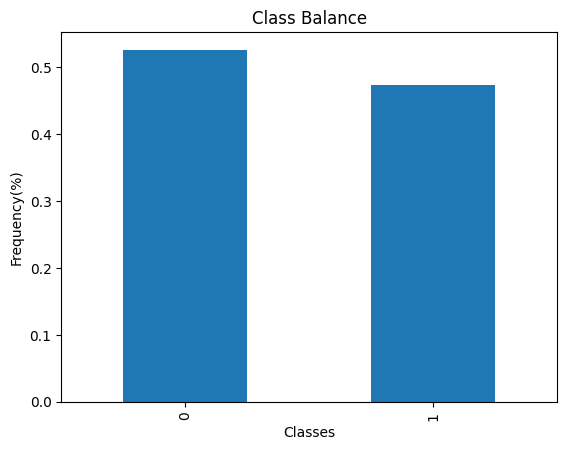

In [8]:
# plot class balance
df_valueCounts = df["Churn"].value_counts(normalize=True)
df_valueCounts.plot(
    kind="bar",
    xlabel="Classes",
    ylabel="Frequency(%)",
    title="Class Balance"
);

#### Class Imbalance Insight:

From the visualization above, it is evident that our binary target feature is imbalanced. The majority of the customers in the dataset belong to the non-churn class (positive class), while the churn class (negative class) represents a smaller portion of the data. This imbalance is something we will need to address during preprocessing, as it may affect the performance and generalizability of our predictive model.

In [9]:
print(df["Age"].unique().max())
df["Age"].describe().to_frame()

65


,Age
count,64374.000000
mean,41.970982
std,13.924911
min,18.000000
25%,30.000000
50%,42.000000
75%,54.000000
max,65.000000


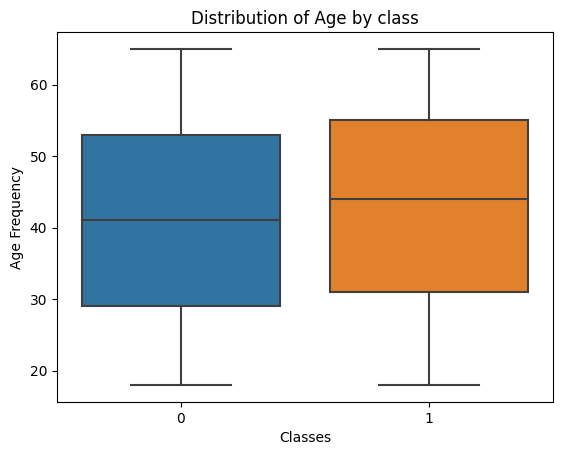

In [10]:
# boxplot using seaborn
sns.boxplot(x="Churn", y="Age", data=df)
plt.xlabel("Classes")
plt.ylabel("Age Frequency")
plt.title("Distribution of Age by class");

#### Insight from Age Distribution by Churn (Boxplot Analysis):
Both the churned (negative class) and non-churned (positive class) customer groups have a minimum age of 18 and a maximum age of 65.

The median age for non-churned customers is approximately 45, while for churned customers it is slightly lower at around 42.

No outliers were observed in the age distribution for either group, suggesting a consistent age range across both churn categories.

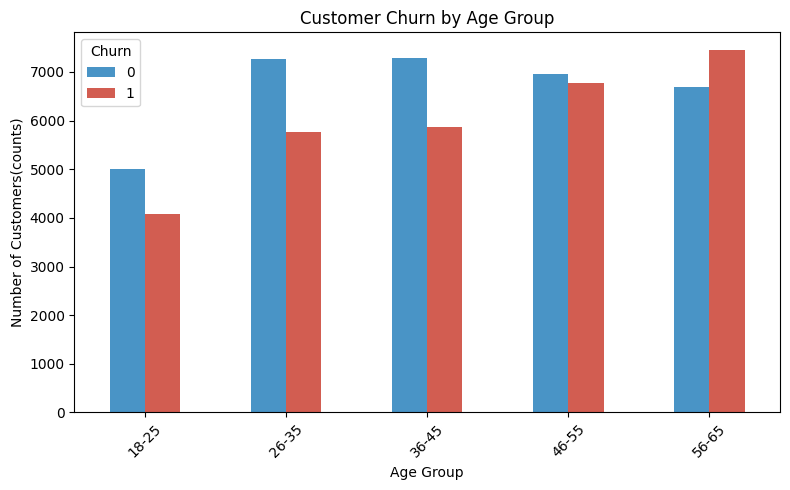

In [13]:
# Group age into bins for better visualization
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65],
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Side-by-side bar chart using seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AgeGroup', hue='Churn', palette={0: '#3498db', 1: '#e74c3c'}, width=0.5)

plt.title('Customer Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers(counts)')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

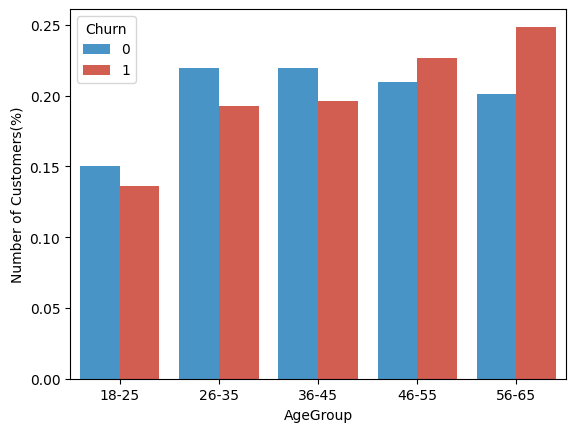

In [14]:
# using method chaining
df_age = (
    df["AgeGroup"]
    .groupby(df["Churn"])
    .value_counts(normalize=True)
    .rename("Number of Customers(%)")
    .to_frame()
    .reset_index()
)
# df_age

# plotting side-by-side bar chart
sns.barplot(
    data=df_age,
    x="AgeGroup",
    y="Number of Customers(%)",
    hue="Churn",
    palette={0: '#3498db', 1: '#e74c3c'}
);

In [15]:
df_age.value_counts(normalize=True).to_frame()

proportion
Churn AgeGroup Number of Customers(%)            
0     18-25    0.150547                       0.1
      26-35    0.219205                       0.1
      36-45    0.219356                       0.1
      46-55    0.209410                       0.1
      56-65    0.201483                       0.1
1     18-25    0.136159                       0.1
      26-35    0.192808                       0.1
      36-45    0.196016                       0.1
      46-55    0.226296                       0.1
      56-65    0.248722                       0.1

In [16]:
df.groupby(['AgeGroup', 'Churn']).size().unstack()

Churn,0,1
AgeGroup,,
18-25,4995,4074
26-35,7273,5769
36-45,7278,5865
46-55,6948,6771
56-65,6685,7442


In [17]:
# value counts based on AgeGroup
df["AgeGroup"].value_counts()
# df["AgeGroup"].value_counts(normalize=True).round(2)*100

AgeGroup
56-65    14127
46-55    13719
36-45    13143
26-35    13042
18-25     9069
Name: count, dtype: int64

#### Insight:

To better understand customer behavior across age groups, I feature-engineered a new column called AgeGroup by binning the Age column into five distinct age ranges.

The goal was to examine how churn varies across different age segments.

From the visualization:

Approximately 7,442 customers aged 56–65 churned, indicating a high churn rate within this group.

Meanwhile, around 7,278 customers aged 36–45 did not churn, suggesting stronger customer retention in this age group.

This also suggests that a significant portion of our overall customer base falls within the 56–65 age group, which may require further analysis to understand and address the reasons behind their high churn rate.

### Gender vs Churn Analysis

In [18]:
df["Gender"].value_counts().to_frame()

,count
Gender,
Female,34353
Male,30021


In [19]:
# churn by gender using the groupby method
df.groupby(["Gender", "Churn"]).size().unstack()

Churn,0,1
Gender,,
Female,15442,18911
Male,18439,11582


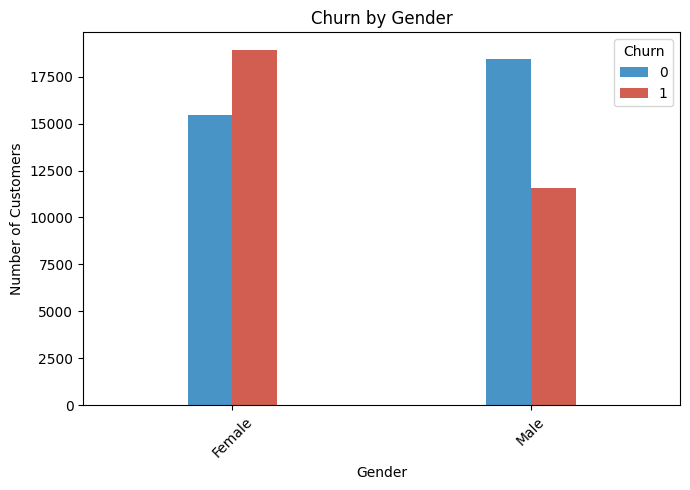

In [20]:
# side-by-side bar chart using seaborn
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Gender", hue="Churn", palette={0: '#3498db', 1: '#e74c3c'}, width=0.3)
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Churn by Gender")
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

#### Insights from Gender vs Churn Analysis:
The majority of our customer base is female.

Approximately 18,911 female customers churned, while 15,442 females did not.

In contrast, around 11,582 male customers churned, while 18,439 males stayed.

Conclusion: A higher number of female customers churned compared to males, making them the majority among churned users.

### Exploring Trends Between Usage Frequency and Total Spend

In [21]:
df["Usage Frequency"].value_counts().head()

Usage Frequency
2    2633
1    2615
3    2488
4    2427
5    2337
Name: count, dtype: int64

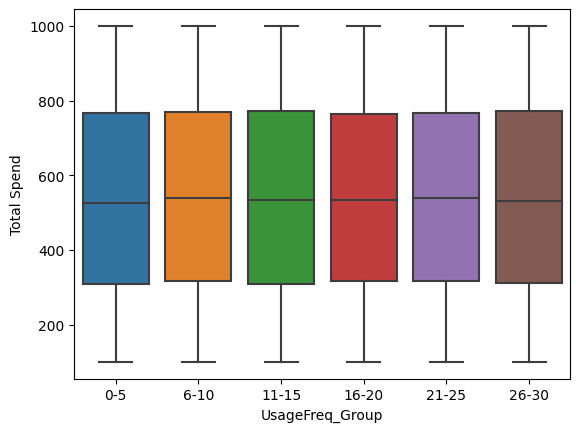

In [22]:
# create bin for Usage frequency
df["UsageFreq_Group"] = pd.cut(
    df["Usage Frequency"], 
    bins = [0,5,10,15,20,25,30],
    labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
)
# creating a boxplot
sns.boxplot(data=df,x="UsageFreq_Group", y='Total Spend');

In [23]:
df.groupby("UsageFreq_Group")["Total Spend"].describe()

,count,mean,std,min,25%,50%,75%,max
UsageFreq_Group,,,,,,,,
0-5,12500.0,538.232000,261.905774,100.0,308.0,527.0,766.0,1000.0
6-10,10312.0,544.374903,259.456078,100.0,318.0,540.0,770.0,1000.0
11-15,10420.0,540.537812,262.419475,100.0,308.0,534.0,771.0,1000.0
16-20,10320.0,539.974806,259.798357,100.0,316.0,535.0,765.0,1000.0
21-25,10461.0,543.016442,259.351148,100.0,318.0,538.0,767.0,1000.0
26-30,10361.0,540.575813,262.092537,100.0,312.0,532.0,771.0,1000.0


#### Insight:
Based on the visualizations and summary statistics, Usage Frequency does not show a strong influence on Total Spend. Most frequency groups have similar median (50th percentile) values, indicating a relatively uniform spending pattern across usage levels.
However, users with a very low frequency (0–5) display a slightly lower median spend, suggesting limited engagement.
Additionally, there is no evidence of significant outliers when comparing these two features, as shown by the boxplots and consistent spread of data across categories.

#### Subscription Type vs Churn Analysis

In [24]:
df["Subscription Type"].value_counts().to_frame()

,count
Subscription Type,
Standard,21502
Basic,21451
Premium,21421


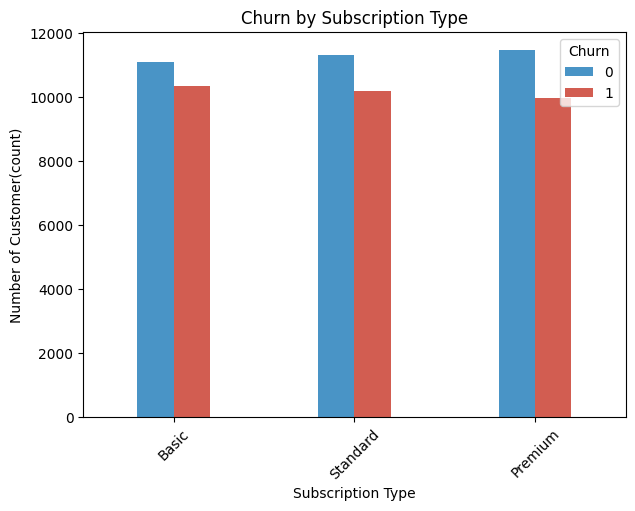

In [25]:
# side-by-side bar chart using seaborn 
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Subscription Type", hue="Churn", palette={0: '#3498db', 1: '#e74c3c'}, width=0.4)
plt.xlabel("Subscription Type")
plt.ylabel("Number of Customer(count)")
plt.title("Churn by Subscription Type")
plt.xticks(rotation=45)
plt.legend(title="Churn");

In [26]:
df.groupby(["Subscription Type", "Churn"]).size().unstack()

Churn,0,1
Subscription Type,,
Basic,11095,10356
Premium,11461,9960
Standard,11325,10177


#### Insight from Subscription Type vs Churn Analysis:
Based on value counts, our customer base is fairly evenly distributed across the three subscription types — approximately 21,500 each for Standard, Basic, and Premium.

However, when we group by both Subscription Type and Churn:

Basic Subscription has the highest number of churned customers (~10,356).

Premium Subscription follows with ~9,960 churned customers.

Standard Subscription has the lowest churn count at ~10,177.

Summary: Although customer counts are similar across all subscription types, churn is slightly higher among Basic Subscription users, while Standard Subscription users show relatively better retention.

#### Contract length vs Churn Analysis

In [27]:
print(list(df['Contract Length'].unique()))
df["Contract Length"].value_counts().to_frame()

['Monthly', 'Annual', 'Quarterly']


,count
Contract Length,
Monthly,22130
Annual,21410
Quarterly,20834


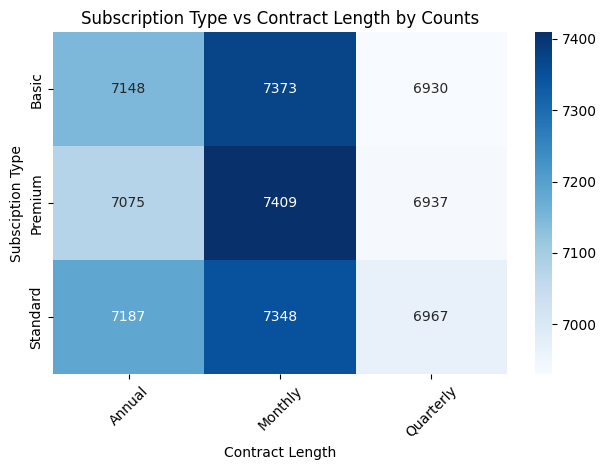

In [28]:
cross = pd.crosstab(df['Subscription Type'], df['Contract Length'])
sns.heatmap(cross, annot=True, fmt="d", cmap="Blues")
# label axis
plt.title("Subscription Type vs Contract Length by Counts")
plt.ylabel("Subsciption Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

In [29]:
cross

Contract Length,Annual,Monthly,Quarterly
Subscription Type,,,
Basic,7148,7373,6930
Premium,7075,7409,6937
Standard,7187,7348,6967


In [30]:
# display correlation matrix using pandas
corr = df.select_dtypes("number").drop(columns="Churn").corr()
corr.style.background_gradient(axis=None)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
Age,1.000000,-0.007763,-0.038331,0.005014,-0.016132,0.006490,-0.000148
Tenure,-0.007763,1.000000,0.023485,0.060065,0.055963,0.009474,0.005770
Usage Frequency,-0.038331,0.023485,1.000000,-0.014072,0.031132,0.001527,-0.009192
Support Calls,0.005014,0.060065,-0.014072,1.000000,0.064298,0.021750,0.001666
Payment Delay,-0.016132,0.055963,0.031132,0.064298,1.000000,-0.031119,-0.008076
Total Spend,0.006490,0.009474,0.001527,0.021750,-0.031119,1.000000,-0.007692
Last Interaction,-0.000148,0.005770,-0.009192,0.001666,-0.008076,-0.007692,1.000000


#### Insight from Correlation Matrix:
The correlation matrix shows weak correlations among the features, indicating a low risk of multicollinearity within the feature matrix.

In [32]:
df.head(2)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeGroup,UsageFreq_Group
CustomerID,,,,,,,,,,,,,
1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,18-25,11-15
2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,36-45,26-30


In [35]:
df.select_dtypes("number").var().sort_values().tail()

Usage Frequency       77.730144
Payment Delay         78.361641
Age                  193.903155
Tenure               292.349607
Total Spend        68055.665975
dtype: float64

### Split Dataset

In [6]:
# Finding the addition and multiplication of 3 numbers
num1 = int(input("Enter any number:"))
num2 = int(input("Enter any number:"))
num3 = int(input("Enter any number:"))

sum_of_num = num1+num2+num3
multiple_of_num = num1*num2*num3

print(sum_of_num)
print(multiple_of_num)

Enter any number: 2
Enter any number: 3
Enter any number: 5


10
30


In [7]:
my_name = str(input("Your name: "))
my_Regno = int(input("Your Regno: "))

print(f"My name is {my_name } and my reg number is {my_Regno}")

Your name:  Nonso
Your Regno:  2024654077


My name is Nonso and my reg number is 2024654077


In [8]:
# num1 = int(2)
# num2 = int(4)
# num3 = int(5)

# if num1>num2:
#     print("It is")
# elif num1:
#     print("It's not")

num = int(input("Enter a number: "))
my_list = list(num)

for i in my_list:
    print(i)

Enter a number:  2


TypeError: 'int' object is not iterable